Pertama-tama, melakukan import library yang akan digunakan untuk data analisis, data visualisasi, data preprocessing dan modelling

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# library for data preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# library for modeling
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

Melakukan loading pada dataset yang digunakan

In [2]:
path = 'EURUSD_BID_sample.csv'
df = pd.read_csv(path)
df.head()

,Time,Open,High,Low,Close,Volume
0,2015-12-29 00:00,1.09746,1.09783,1.09741,1.09772,4.866800e+08
1,2015-12-29 00:15,1.09772,1.09800,1.09770,1.09790,4.459200e+08
2,2015-12-29 00:30,1.09790,1.09805,1.09782,1.09792,1.210700e+09
3,2015-12-29 00:45,1.09792,1.09825,1.09775,1.09808,1.116910e+09
4,2015-12-29 01:00,1.09808,1.09824,1.09791,1.09822,5.038800e+08


Mencetak dataset yang digunakan

In [3]:
print(f'Data memiliki {df.shape[0]} records dan {df.shape[1]} columns.')

Data memiliki 14880 records dan 6 columns.


Dataset yang digunakan memiliki 14880 records dan 6 columns.

1. Time : merupakan tanggal dan waktu data tersebut direkam
2. Open : merupakan harga pembukaan pada hari tersebut
3. High : merupakan harga tertinggi pada hari tersebut
4. Low : merupakan harga terendah pada hari tersebut
5. Close : merupakan harga penutupan pada hari tersebut
6. Volume : merupakan banyaknya transaksi pada hari tersebut

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14880 entries, 0 to 14879
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    14880 non-null  object 
 1   Open    14880 non-null  float64
 2   High    14880 non-null  float64
 3   Low     14880 non-null  float64
 4   Close   14880 non-null  float64
 5   Volume  14880 non-null  float64
dtypes: float64(5), object(1)
memory usage: 697.6+ KB


Mencetak missing value dalam dataframe

In [5]:
print('Total missing value dalam dataframe : ', df.isnull().sum().sum(), 'records')

Total missing value dalam dataframe :  0 records


Dari output diatas, dapat dilihat bahwa dataframe tidak memiliki missing value, sehingga bisa melanjutkan ke tahap berikutnya.

In [6]:
df.describe()

,Open,High,Low,Close,Volume
count,14880.000000,14880.000000,14880.000000,14880.000000,1.488000e+04
mean,1.114205,1.114506,1.113912,1.114206,2.012026e+09
std,0.020067,0.020055,0.020078,0.020066,1.987289e+09
min,1.071500,1.072250,1.071070,1.071500,0.000000e+00
25%,1.093000,1.093090,1.093000,1.093000,0.000000e+00
50%,1.116240,1.116460,1.116240,1.116240,1.637270e+09
75%,1.130740,1.130970,1.130323,1.130740,3.274062e+09
max,1.160220,1.161620,1.159960,1.160240,1.228204e+10


Data visualiation dengan menggunakan boxplot dari library seaborn

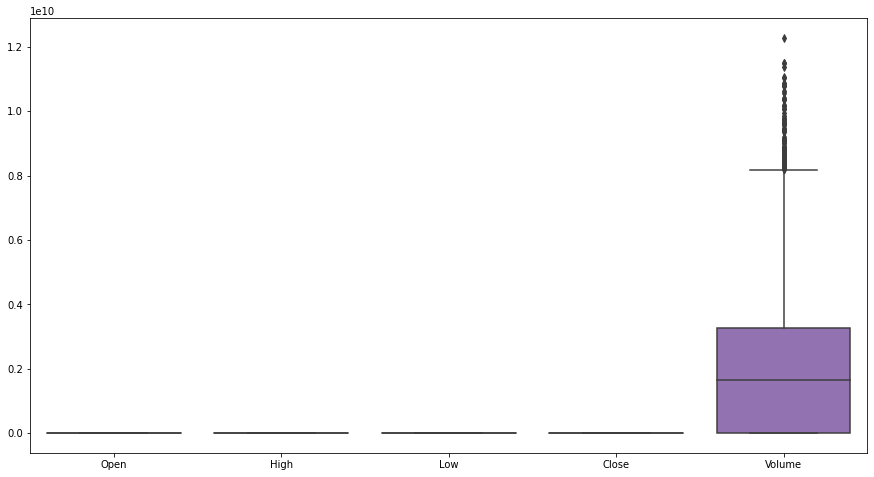

In [7]:
numerical_col = [col for col in df.columns if df[col].dtypes == 'float64']
plt.figure(figsize = (15,8))
sns.boxplot(data = df[numerical_col])
plt.show()

Output diatas merupakan visualisasi outlier pada data. Dimana pada output tersebut menggunakan boxplot dan library seaborn.

In [8]:
Q1 = df.quantile(.25)
Q3 = df.quantile(.75)
IQR = Q3 - Q1
bottom = Q1 - 1.5 * IQR
top = Q3 + 1.5 * IQR
df = df[~((df < bottom) | (df > top)).any(axis=1)]
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


,Time,Open,High,Low,Close,Volume
0,2015-12-29 00:00,1.09746,1.09783,1.09741,1.09772,4.866800e+08
1,2015-12-29 00:15,1.09772,1.09800,1.09770,1.09790,4.459200e+08
2,2015-12-29 00:30,1.09790,1.09805,1.09782,1.09792,1.210700e+09
3,2015-12-29 00:45,1.09792,1.09825,1.09775,1.09808,1.116910e+09
4,2015-12-29 01:00,1.09808,1.09824,1.09791,1.09822,5.038800e+08


Mencetak jumlah data pada dataset

In [9]:
print(f'Data memiliki {df.shape[0]} records dan {df.shape[1]} columns.')

Data memiliki 14783 records dan 6 columns.


Melakukan univariate analysis

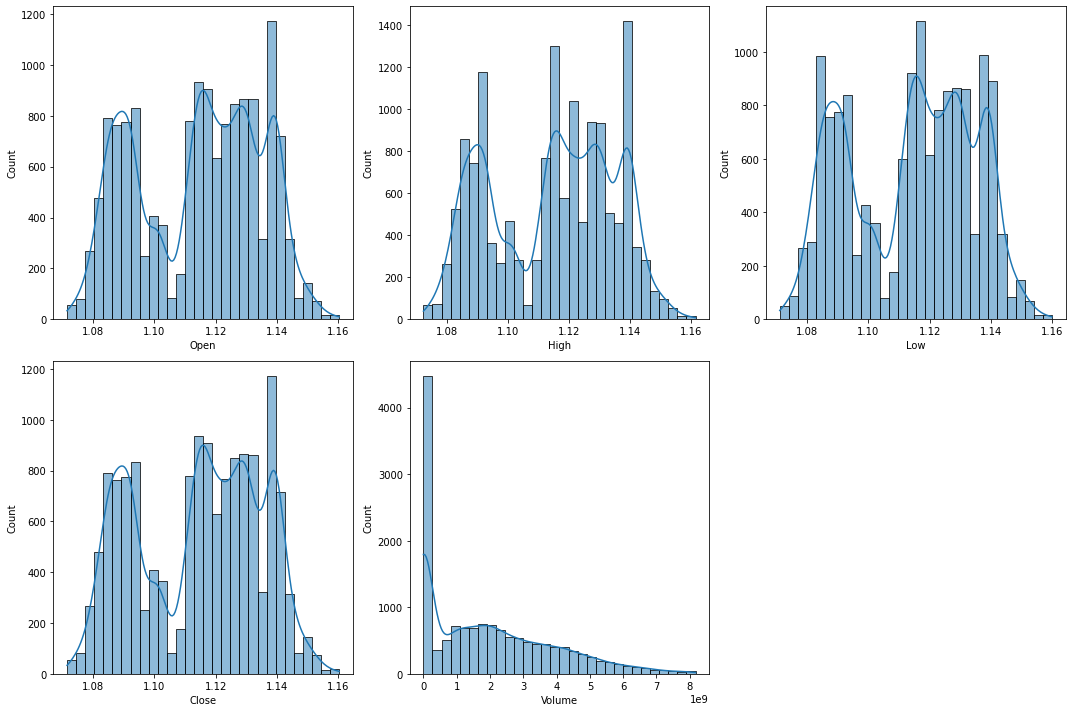

In [10]:
cols = 3
rows = 2
fig = plt.figure(figsize=(cols * 5, rows * 5))

for i, col in enumerate(numerical_col):
  ax = fig.add_subplot(rows, cols, i + 1)
  sns.histplot(x = df[col], bins = 30, kde = True, ax = ax)
fig.tight_layout()
plt.show()

Melakukan multivariate analysis

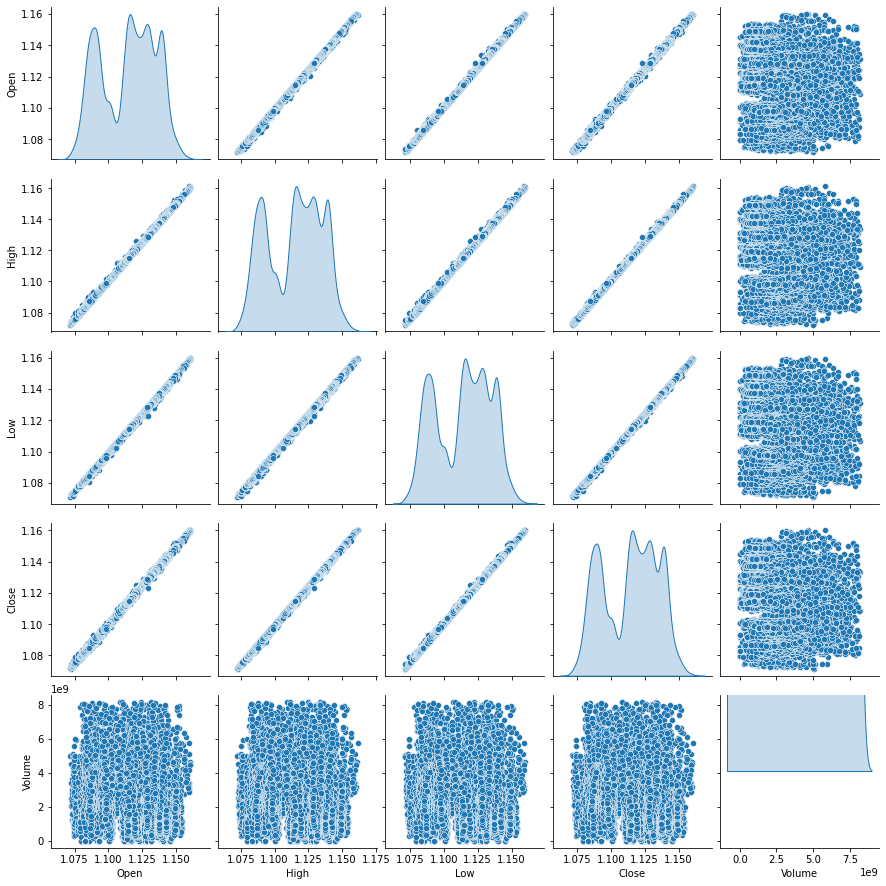

In [11]:
sns.pairplot(df[numerical_col], diag_kind = 'kde')
plt.show()

Membuat matriks korelasi untuk numerical feature

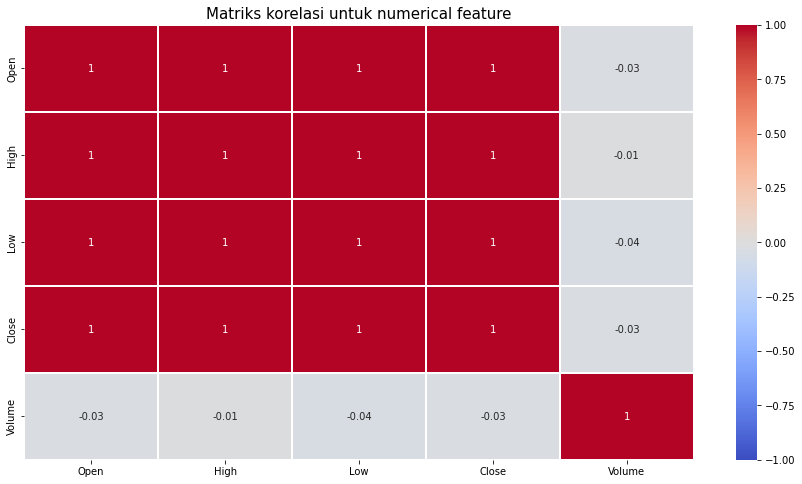

In [12]:
plt.figure(figsize = (15,8))
corr = df[numerical_col].corr().round(2)
sns.heatmap(data = corr, annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm', linewidth = 1)
plt.title('Matriks korelasi untuk numerical feature', size = 15)
plt.show()

Selanjutnya, akan melakukan penghapusan pada kolom 'Time', 'Volume', dan 'Close'. Hal tersebut dikarenakan kolom-kolom tersebut dirasa tidak diperlukan oleh model dan data tersebut akan mengganggu model dalam proses training.

In [13]:
df = df.drop(['Time', 'Volume', 'Close'], axis = 1)
df.head()

,Open,High,Low
0,1.09746,1.09783,1.09741
1,1.09772,1.09800,1.09770
2,1.09790,1.09805,1.09782
3,1.09792,1.09825,1.09775
4,1.09808,1.09824,1.09791


Melakukan splitting pada dataset

In [23]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

print('Total X_train :', len(X_train), 'records')
print('Total y_train :', len(y_train), 'records')
print('Total X_test :', len(X_test), 'records')
print('Total y_test :', len(y_test), 'records')

Total X_train : 11826 records
Total y_train : 11826 records
Total X_test : 2957 records
Total y_test : 2957 records


Untuk melakukan normalisasi data, akan menggunakan library MinMaxScaler. Fungsi dari normalisasi pada data agar model lebih cepat dalam mempelajari data, karena data telah diubah pada rentang tertentu seperti antara 0 dan 1.

In [15]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = pd.DataFrame(columns = ['train_mse', 'test_mse'], index = ['SVR', 'KNN', 'GradientBoosting'])

Langkah selanjutnya melakukan hyperparameter tuning. Hyperparameter tuning adalah salah satu teknik yang dilakukan akan model dapat berjalan dengan performa terbaik. Biasanya dalam hyperparameter tuning, hyperparameter akan ditentukan secara acak oleh teknisi. Namun jika tidak ingin mencoba coba hyperparameter mana yang terbaik, dapat menggunakan GridSearch. GridSearch merupakan sebuah teknik yang memungkinkan untuk menguji beberapa hyperparameter sekaligus pada sebuah model.

In [24]:
def grid_search(model, hyperparameters):
  results = GridSearchCV(
      model,
      hyperparameters,
      cv = 5,
      verbose = 1,
      n_jobs = 6)

  return results
  
svr = SVR()
hyperparameters = {
    'kernel': ['rbf'],
    'C': [0.001, 0.01, 0.1, 10, 100, 1000],
    'gamma': [0.3, 0.03, 0.003, 0.0003]
}

svr_search = grid_search(svr, hyperparameters)
svr_search.fit(X_train, y_train)
print(svr_search.best_params_)
print(svr_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'C': 0.001, 'gamma': 0.3, 'kernel': 'rbf'}
-0.006962831933795721


n_neighbors, hyperparameter ini adalah jumlah tetangga yang diperlukan untuk menentukan letak data baru.

In [25]:
knn = KNeighborsRegressor()
hyperparameters = {
    'n_neighbors': range(1, 10)}

knn_search = grid_search(knn, hyperparameters)
knn_search.fit(X_train, y_train)
print(knn_search.best_params_)
print(knn_search.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'n_neighbors': 9}
0.9996453080074058


Model training

In [26]:
svr = SVR(C = 10, gamma = 0.3, kernel = 'rbf')
svr.fit(X_train, y_train)

SVR(C=10, gamma=0.3)

Gradient Boosting Regression

In [27]:
gradient_boost = GradientBoostingRegressor(criterion = 'squared_error', learning_rate = 0.01, n_estimators = 1000)
gradient_boost.fit(X_train, y_train)

GradientBoostingRegressor(criterion='squared_error', learning_rate=0.01,
                          n_estimators=1000)

K-Nearest Neighbors (KNN)

In [28]:
knn = KNeighborsRegressor(n_neighbors = 9)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=9)

Model evaluation

In [21]:
model_dict = {
    'SVR': svr,
    'GradientBoosting': gradient_boost,
    'KNN': knn,
}

for name, model in model_dict.items():
  models.loc[name, 'train_mse'] = mean_squared_error(y_train, model.predict(X_train))
  models.loc[name, 'test_mse'] = mean_squared_error(y_test, model.predict(X_test))

models.head()

,train_mse,test_mse
SVR,0.000404,0.000415
KNN,0.0,0.0
GradientBoosting,0.0,0.0


Plot diagram

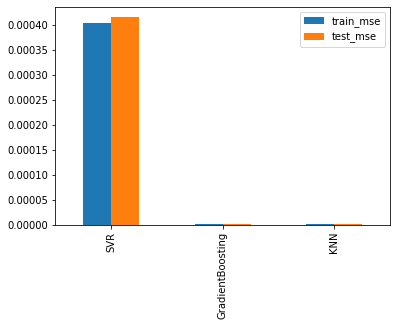

In [22]:
models.sort_values(by = 'test_mse', ascending = False).plot(kind = 'bar', zorder = 3)